Lists of countries by life expectancy: [world](https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy), [Europe](https://en.wikipedia.org/wiki/List_of_European_countries_by_life_expectancy), [Asia](https://en.wikipedia.org/wiki/List_of_Asian_countries_by_life_expectancy), [South America](https://en.wikipedia.org/wiki/List_of_South_American_countries_by_life_expectancy), [Africa](https://en.wikipedia.org/wiki/List_of_African_countries_by_life_expectancy),  [regions](https://en.wikipedia.org/wiki/List_of_world_regions_by_life_expectancy)<br />
Списки стран по ожидаемой продолжительности жизни: [мир в целом](https://ru.wikipedia.org/wiki/Список_стран_по_ожидаемой_продолжительности_жизни), [Европа](https://ru.wikipedia.org/wiki/Список_стран_Европы_по_ожидаемой_продолжительности_жизни), [Азия](https://ru.wikipedia.org/wiki/Список_стран_Азии_по_ожидаемой_продолжительности_жизни), [Южная Америка](https://ru.wikipedia.org/wiki/Список_стран_Южной_Америки_по_ожидаемой_продолжительности_жизни),  [Африка](https://ru.wikipedia.org/wiki/Список_стран_Африки_по_ожидаемой_продолжительности_жизни), [СНГ](https://ru.wikipedia.org/wiki/Содружество_Независимых_Государств#Социальное_развитие_стран_СНГ),  [регионы](https://ru.wikipedia.org/wiki/Список_регионов_мира_по_ожидаемой_продолжительности_жизни)<br />
[Список государств и зависимых территорий по населению](https://ru.wikipedia.org/wiki/Список_государств_и_зависимых_территорий_по_населению)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from eng_rus_dictionary import dd_to_rus  # dictionary for translation of names

In [2]:
pd.options.display.max_columns = 50

DESTINATION_OUTPUT = 'file'  # to where table code should be placed: 'file', 'show'
LANG = 'en'

In [3]:
# load data for countries
df = pd.read_csv('data/WHO_2019_countries.csv', header=[0,1], index_col=0)  # dfc - data frame countries
print(df.shape)
# df.loc[['Global']]
df.head(4)

(732, 13)


Unnamed: 1_level_0 Life expectancy at birth (years)               \
Country                   Year                       Both sexes  Male Female   
Afghanistan               2019                             63.2  63.3   63.2   
Afghanistan               2015                             61.7  61.0   62.3   
Afghanistan               2010                             59.9  59.6   60.3   
Afghanistan               2000                             55.0  54.6   55.4   

            Life expectancy at age 60 (years)               \
Country                            Both sexes  Male Female   
Afghanistan                              15.2  15.4   15.1   
Afghanistan                              15.6  15.7   15.5   
Afghanistan                              15.1  15.1   15.2   
Afghanistan                              13.9  13.6   14.2   

            Healthy life expectancy (HALE) at birth (years)               \
Country                                          Both sexes  Male Female   
Afghanistan                                            53.9  54.7   53.2   
Afghanistan                                            52.6  52.8   52.4   
Afghanistan                                            51.1  51.5   50.7   
Afghanistan                                            46.8  46.9   46.6   

            Healthy life expectancy (HALE) at age 60 (years)               
Country                                           Both sexes  Male Female  
Afghanistan                                             10.8  11.2   10.6  
Afghanistan                                             11.2  11.5   10.9  
Afghanistan                                             10.9  11.1   10.7  
Afghanistan                                             10.2  10.2   10.1

In [4]:
# load data for regions
dfr = pd.read_csv('data/WHO_2019_regions.csv', header=[0,1], index_col=0)  # dfr - data frame regions
print(dfr.shape)
dfr.head(4)

(28, 13)


Unnamed: 1_level_0 Life expectancy at birth (years)               \
WHO region               Year                       Both sexes  Male Female   
Global                   2019                             73.3  70.8   75.9   
Global                   2015                             72.3  69.8   74.9   
Global                   2010                             70.5  68.0   73.2   
Global                   2000                             66.8  64.4   69.3   

           Life expectancy at age 60 (years)               \
WHO region                        Both sexes  Male Female   
Global                                  21.1  19.5   22.7   
Global                                  20.8  19.1   22.3   
Global                                  20.1  18.4   21.7   
Global                                  18.8  17.2   20.4   

           Healthy life expectancy (HALE) at birth (years)               \
WHO region                                      Both sexes  Male Female   
Global                                                63.7  62.5   64.9   
Global                                                62.9  61.7   64.2   
Global                                                61.5  60.2   62.9   
Global                                                58.3  57.1   59.6   

           Healthy life expectancy (HALE) at age 60 (years)               
WHO region                                       Both sexes  Male Female  
Global                                                 15.8  14.8   16.6  
Global                                                 15.5  14.6   16.4  
Global                                                 15.1  14.1   16.1  
Global                                                 14.1  13.1   15.1

In [5]:
# get list of regions
ls_regions = sorted(dfr.index.unique().to_list())
print(ls_regions)

['Africa', 'Americas', 'Eastern Mediterranean', 'Europe', 'Global', 'South-East Asia', 'Western Pacific']


In [6]:
# concatenate two dataFrames
df = pd.concat([df, dfr])
del dfr
print(df.shape)

(760, 13)


<br />
<br />

In [7]:
# get headings of the dataframe
heading = df.columns
heading

MultiIndex([(                              'Unnamed: 1_level_0',       'Year'),
            (                'Life expectancy at birth (years)', 'Both sexes'),
            (                'Life expectancy at birth (years)',       'Male'),
            (                'Life expectancy at birth (years)',     'Female'),
            (               'Life expectancy at age 60 (years)', 'Both sexes'),
            (               'Life expectancy at age 60 (years)',       'Male'),
            (               'Life expectancy at age 60 (years)',     'Female'),
            ( 'Healthy life expectancy (HALE) at birth (years)', 'Both sexes'),
            ( 'Healthy life expectancy (HALE) at birth (years)',       'Male'),
            ( 'Healthy life expectancy (HALE) at birth (years)',     'Female'),
            ('Healthy life expectancy (HALE) at age 60 (years)', 'Both sexes'),
            ('Healthy life expectancy (HALE) at age 60 (years)',       'Male'),
            ('Healthy life expectancy (H

In [8]:
# modify and reduce dataframe for convenience of futher processing
dd_replace_0 = {
    'Life expectancy at birth (years)': 'LE_birth',
    'Life expectancy at age 60 (years)': 'LE_60',
    'Healthy life expectancy (HALE) at birth (years)': 'HALE_birth',
    'Healthy life expectancy (HALE) at age 60 (years)': 'HALE_60',
    'Unnamed: 1_level_0': ''
}
dd_replace_1 = {
    'Both sexes': '_o',
    'Male': '_m',
    'Female': '_f',
    'Year': 'year'
}
df.columns = [dd_replace_0[tp[0]] + dd_replace_1[tp[1]] for tp in heading]
df = df[df['year'].isin([2019, 2010, 2000])]

dd_replace_name = {
    'Global': 'world',
    'Russian Federation': 'Russia',
    'Republic of Korea': 'South Korea',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran (Islamic Republic of)': 'Iran',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Republic of Moldova': 'Moldova',
    'Syrian Arab Republic': 'Syria',
    "Democratic People's Republic of Korea": "North Korea",
    'Bolivia (Plurinational State of)': 'Bolivia',
    "Lao People's Democratic Republic": "Laos",
    'United Republic of Tanzania': 'Tanzania',
    'Congo': 'Republic of\nCongo',
    'Democratic Republic of the Congo': 'DR Congo',
    'Micronesia (Federated States of)': 'Micronesia',
    'Brunei Darussalam': 'Brunei',
    'Türkiye': 'Turkey',
    'United States of America': 'USA',
    'United Arab Emirates': 'UAE',
    'Viet Nam': 'Vietnam',
    'Dominican Republic': 'Dominican\nRepublic',
    'Trinidad and Tobago': 'Trinidad &\nTobago',
    'Papua New Guinea': 'Papua\nNew Guinea',
    'Central African Republic': 'CAR',
    'Bosnia and Herzegovina': 'Bosnia &\nHerzegovina',
    'North Macedonia': 'North\nMacedonia',
    'South-East Asia': 'South-East\nAsia',
    'Eastern Mediterranean': 'Eastern\nMediterranean',
    'Western Pacific': 'Western\nPacific'
}
df.rename(index=dd_replace_name, inplace=True)

print(df.shape)
df.loc[['world', 'Russia']]

(570, 13)


,year,LE_birth_o,LE_birth_m,LE_birth_f,LE_60_o,LE_60_m,LE_60_f,HALE_birth_o,HALE_birth_m,HALE_birth_f,HALE_60_o,HALE_60_m,HALE_60_f
world,2019,73.3,70.8,75.9,21.1,19.5,22.7,63.7,62.5,64.9,15.8,14.8,16.6
world,2010,70.5,68.0,73.2,20.1,18.4,21.7,61.5,60.2,62.9,15.1,14.1,16.1
world,2000,66.8,64.4,69.3,18.8,17.2,20.4,58.3,57.1,59.6,14.1,13.1,15.1
Russia,2019,73.2,68.2,78.0,19.9,16.8,22.2,64.2,60.7,67.5,15.0,12.8,16.7
Russia,2010,68.8,62.9,74.7,17.8,14.5,20.2,60.5,56.2,64.9,13.4,11.0,15.1
Russia,2000,65.3,59.0,72.3,16.4,13.3,18.7,57.3,52.4,62.8,12.3,9.9,14.0


In [9]:
# Take only data about life expectancy and HALE at birth
year_selected = 2019
df = df[df.year == year_selected] \
       .loc[:, ['LE_birth_o', 'LE_birth_m', 'LE_birth_f', 'HALE_birth_o', 'HALE_birth_m', 'HALE_birth_f']]
df.loc[['world', 'Russia', 'Turkey']]

,LE_birth_o,LE_birth_m,LE_birth_f,HALE_birth_o,HALE_birth_m,HALE_birth_f
world,73.3,70.8,75.9,63.7,62.5,64.9
Russia,73.2,68.2,78.0,64.2,60.7,67.5
Turkey,78.6,76.4,80.7,68.4,67.8,69.0


In [10]:
def process_chart_result(plt, lang=LANG, destination=DESTINATION_OUTPUT, file_name=None):
    if destination == 'file':
        plt.savefig(f"output-charts/{file_name}{' -ru' if lang=='ru' else ''}.png", bbox_inches='tight', facecolor='white', pad_inches=0.05)  
        print('Data has written to file')
    elif destination == 'file-leader':
        if file_name_full:
            plt.savefig(f"output-leader/{file_name_full} -diff{' -ru' if lang=='ru' else ''}.png",
                        bbox_inches='tight', facecolor='white', pad_inches=0.05)
        else:
            plt.savefig(f"output-leader/Life expectancy by WBG -{file_name_partial} -leader{' -ru' if lang=='ru' else ''}.png",
                        bbox_inches='tight', facecolor='white', pad_inches=0.05)        
        print('Data has written to file')
    else:
        plt.show()

In [11]:
def create_categories_for_wiki(ls:list):
    for country in ls:
        print(f"[[Category:Life expectancy charts for {country}]]")

In [12]:
def compare_countries(df, ls_countries, columns_sorting=['LE_birth_o', 'HALE_birth_o'], figure_size=(28, 8), lang=LANG, title_en='', title_ru='', destination=DESTINATION_OUTPUT, file_name='LE'):
    plt.rcParams['figure.figsize'] = figure_size

    df = df.loc[ls_countries]                                          # filter given dataframe
    print(f"Number of items: {len(df)}")
    df.sort_values(by=columns_sorting, ascending=False, inplace=True)  # sort dataframe

    fig, ax = plt.subplots()

    ax.set_title(label=title_ru if lang=='ru' else title_en, fontsize=14)  # set title

    ax.tick_params(axis='x', pad=1.5)                                  # set where ticks and labels will be shown around charts
    ax.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)

    major_ticks = range(0, 91, 10)     # major ticks every 10 years on y-axe
    minor_ticks = range(0, 91, 5)      # minor ticks every  5 years on y-axe
    
    ax.set_yticks(ticks=major_ticks, labels = list(major_ticks[:-1]) + [''])  # the chart is more clear if we don't place label '90' on y-axis  # ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    
    ax.grid(which='minor', axis='y', color='grey', linewidth=0.25)  # settle grid
    ax.grid(which='major', axis='y', color='grey', linewidth=0.5)

    plt.xticks(fontsize=15, rotation=90)   # set labels on axes, labels of countries are rotated to 90 degrees
    plt.yticks(fontsize=13)
    
    if lang=='ru':                 # if language is Russian than translate labels
        ax.set_xticks(ticks=list(range(len(df))), labels = (dd_to_rus[name] for name in df.index))

    plt.ylim(0, 90)                # limit chat by y-axis
    plt.xlim(-0.55, len(df)-0.45)  # remove gaps between bars and vertical edges of the chart

    bar_hale = plt.bar(df.index, df['HALE_birth_o'], color='green', zorder=20, width=0.9, edgecolor='black', linewidth=0.75, label='ОПЗЖ' if lang=='ru' else 'HALE')
    bar_le = plt.bar(df.index, df['LE_birth_o'], color='orange', zorder=10, width=0.9, edgecolor='black', linewidth=0.75, label='ОПЖ в плохим здоровьем' if lang=='ru' else 'LE with disability')

    # Add text with LE and HALE values
    for rect in bar_le:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0 +0.01, height-1.2, f'{height:.1f}', ha='center', va='top', zorder=30, fontsize='x-large')

    for rect in bar_hale:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0 +0.01, height-1.2, f'{height:.1f}', ha='center', va='top', zorder=30, fontsize='x-large', color='white', weight='bold')
        
    ax.legend(loc='upper right', ncol=2, fontsize=11.25)  # add legend

    process_chart_result(plt, lang=lang, destination=destination, file_name=file_name)
    
    # create_categories_for_wiki(df.index.to_list())
    
    return None

In [13]:
def compare_countries_by_gender(df, ls_countries, columns_sorting=['LE_birth_o', 'HALE_birth_o'], figure_size=(28, 8),
                                lang=LANG, title_en='', title_ru='', short_legend=False, hide_upper_label=False, destination=DESTINATION_OUTPUT, file_name='LE'):
    plt.rcParams['figure.figsize'] = figure_size

    df = df.loc[ls_countries]                                          # filter given dataframe
    df.sort_values(by=columns_sorting, ascending=False, inplace=True)  # sort dataframe

    fig, ax = plt.subplots()

    ax.set_title(label=title_ru if lang=='ru' else title_en, fontsize=14)  # set title

    ax.tick_params(axis='x', pad=1.5)                                  # set where ticks and labels will be shown around charts
    ax.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)

    major_ticks = range(0, 96, 10)     # major ticks every 10 years on y-axe
    minor_ticks = range(0, 96, 5)      # minor ticks every  5 years on y-axe
    
    if hide_upper_label:  # hide upper label in this is required
        ax.set_yticks(ticks=major_ticks, labels = list(major_ticks[:-1]) + [''])
    else:
        ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    
    ax.grid(which='minor', axis='y', color='grey', linewidth=0.25)  # settle grid
    ax.grid(which='major', axis='y', color='grey', linewidth=0.5)

    plt.xticks(fontsize=15, rotation=90)   # set labels on axes, labels of countries are rotated to 90 degrees
    plt.yticks(fontsize=13)
    
    # ax.set_yticks(major_ticks)  # ax.set_yticks(ticks=major_ticks, labels = list(major_ticks[:-1]) + [''])  # the chart is more clear if we don't place label '90' on y-axis
    ax.set_xticks(ticks=list(range(len(df))), labels = (dd_to_rus[name] for name in df.index) if lang=='ru' else df.index)

    plt.ylim(0, 95)                # limit chat by y-axis
    plt.xlim(-0.55, len(df)-0.45)  # remove gaps between bars and vertical edges of the chart
    
    # Place bar charts
    shift = 0.35
    if not short_legend:  # value 'short_legend' determines different order of items in the legend
        bar_m_hale = plt.bar([x-shift/2 for x in range(len(df))], df['HALE_birth_m'], color='blue', zorder=20, width=shift, edgecolor='black', linewidth=0.75, label='ОПЗЖ для мужчин' if lang=='ru' else 'HALE for male')
        bar_m_le = plt.bar([x-shift/2 for x in range(len(df))], df['LE_birth_m'], color='paleturquoise', zorder=10, width=shift, edgecolor='black', linewidth=0.75, label= 'ОПЖ в плохим здоровье для мужчин' if lang=='ru' else 'LE with disability for male')
        bar_f_hale = plt.bar([x+shift/2 for x in range(len(df))], df['HALE_birth_f'], color='red', zorder=20, width=shift, edgecolor='black', linewidth=0.75, label='ОПЖЗ для женщин' if lang=='ru' else 'HALE for female')
        bar_f_le = plt.bar([x+shift/2 for x in range(len(df))], df['LE_birth_f'], color='mistyrose', zorder=10, width=shift, edgecolor='black', linewidth=0.75, label='ОПЖ в плохим здоровье для женщин' if lang=='ru' else 'LE with disability for female')
    else:
        bar_m_le = plt.bar([x-shift/2 for x in range(len(df))], df['LE_birth_m'], color='paleturquoise', zorder=10, width=shift, edgecolor='black', linewidth=0.75, label='ОПЖ в плохим здоровье для мужчин' if lang=='ru' else 'LE with disability for male')
        bar_m_hale = plt.bar([x-shift/2 for x in range(len(df))], df['HALE_birth_m'], color='blue', zorder=20, width=shift, edgecolor='black', linewidth=0.75, label='ОПЗЖ для мужчин' if lang=='ru' else 'HALE for male')
        bar_f_le = plt.bar([x+shift/2 for x in range(len(df))], df['LE_birth_f'], color='mistyrose', zorder=10, width=shift, edgecolor='black', linewidth=0.75, label='ОПЖ в плохим здоровье для женщин' if lang=='ru' else 'LE with disability for female')
        bar_f_hale = plt.bar([x+shift/2 for x in range(len(df))], df['HALE_birth_f'], color='red', zorder=20, width=shift, edgecolor='black', linewidth=0.75, label='ОПЖЗ для женщин' if lang=='ru' else 'HALE for female')
    
    ax.legend(loc='upper right', ncol=2 if short_legend else 4, fontsize=11.25)  # add legend
    
    process_chart_result(plt, lang=lang, destination=destination, file_name=file_name)
    
    return None

# ОПЖ в болезнях для мужчин    # ОПЖ с плохим здоровьем для мужчин
# ОПЖ в болезнях для женщин    # ОПЖ с плохим здоровьем для женщин


# short_legend = (LANG=='ru')

# compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
#                             title_en=title_en, title_ru=title_ru, short_legend=short_legend, hide_upper_label=True, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -WHO regions -gender')

<br />
<br />

**world**:
[list by life expectancy](https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy),
[list by population](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population#Sovereign_states_and_dependencies_by_population),
[list according to UN](https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations))

Number of items: 40
Data has written to file


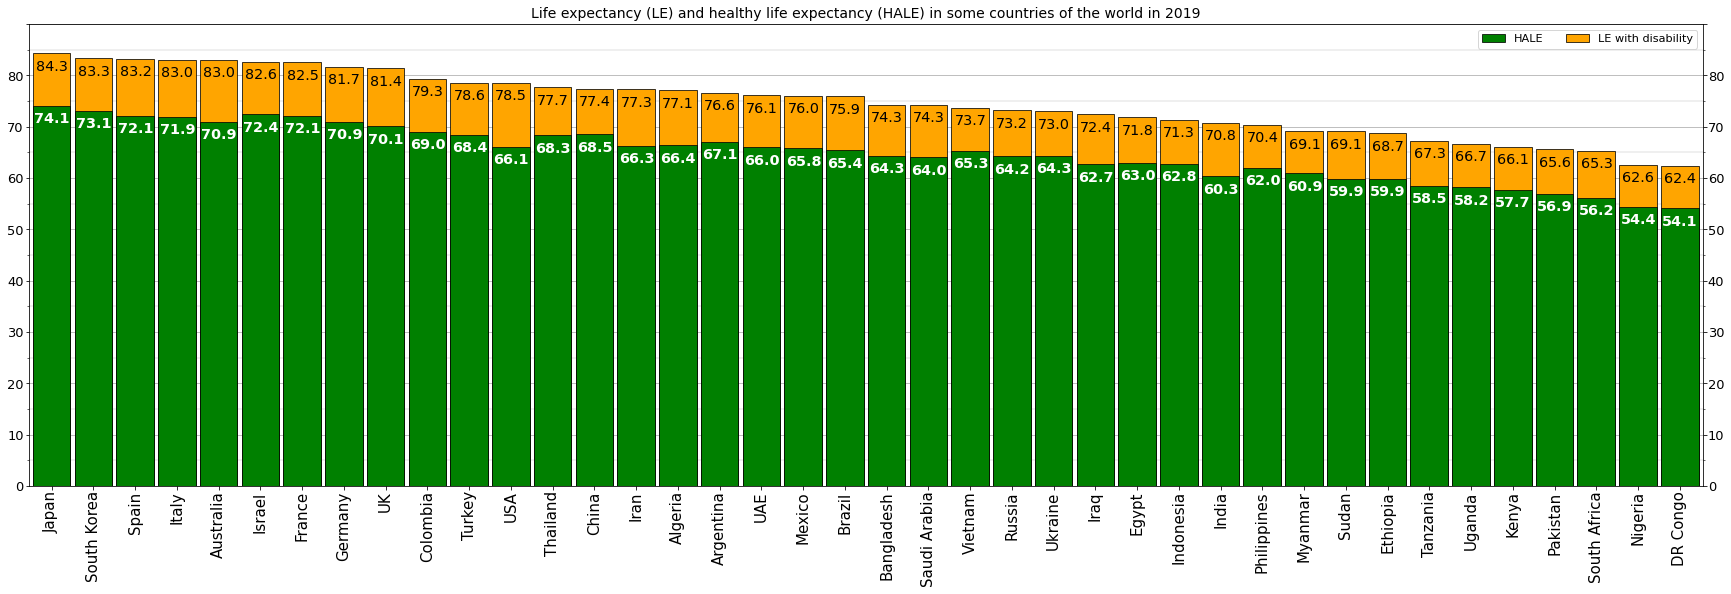

In [14]:
ls_countries = ['China', 'USA', 'Russia', 'UK', 'France', 'Germany', 'Spain', 'Italy', 'India', 'Japan', 'South Korea', 'Indonesia', 'Bangladesh'] +\
               ['Philippines', 'Pakistan', 'Israel', 'Saudi Arabia', 'Australia', 'Egypt', 'Turkey', 'UAE', 'Nigeria', 'Brazil', 'Mexico'] +\
               ['Ethiopia', 'Vietnam', 'DR Congo', 'Iran', 'Thailand', 'Ukraine', 'Tanzania', 'South Africa', 'Argentina', 'Colombia', 'Algeria'] +\
               ['Myanmar', 'Kenya', 'Sudan', 'Uganda', 'Iraq']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
figure_size=(30, 8.5)
title_en = 'Life expectancy (LE) and healthy life expectancy (HALE) in some countries of the world in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ) в некоторых странах мира в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -world')

Data has written to file


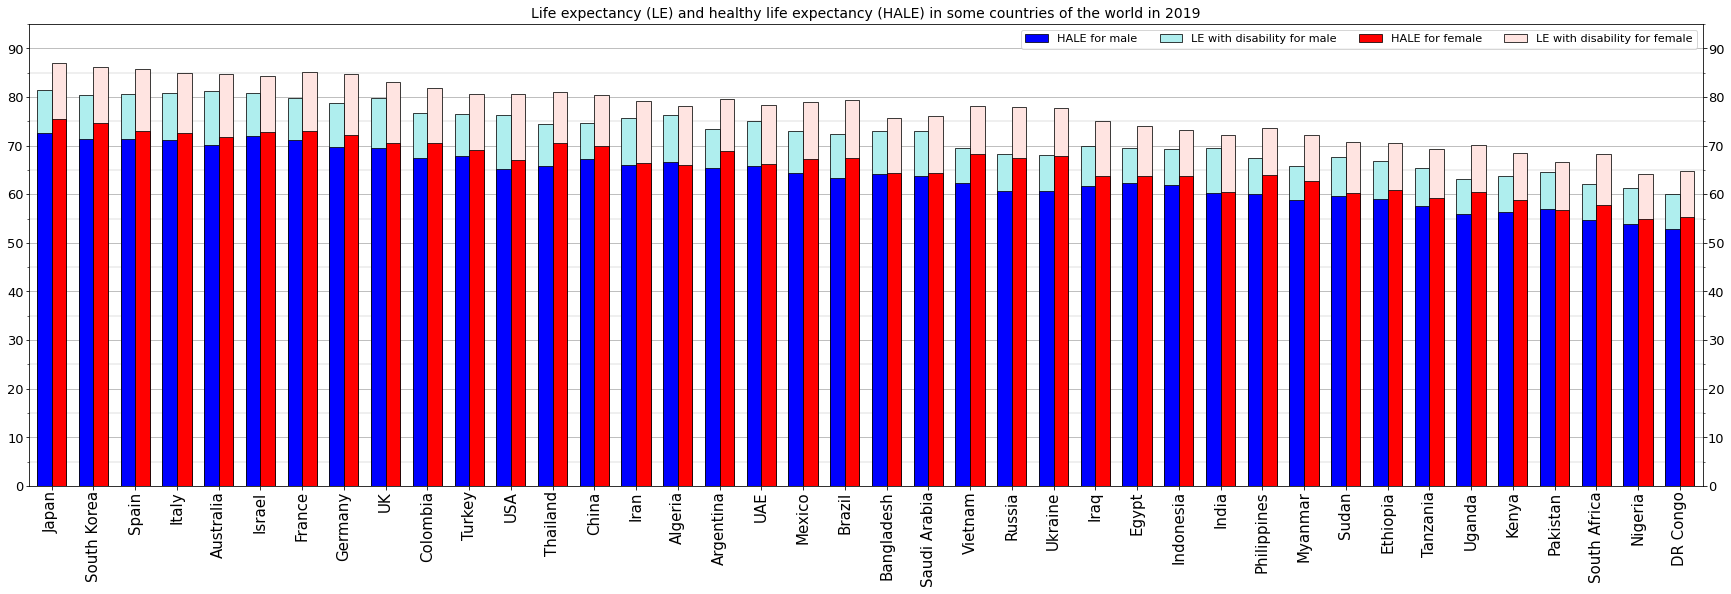

In [15]:
compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -world -gender')

<br />
<br />

**Europe**:
[list by life expectancy](https://en.wikipedia.org/wiki/List_of_European_countries_by_life_expectancy),
[list by population](https://en.wikipedia.org/wiki/List_of_European_countries_by_population#Table),
[list of states](https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_Europe#Sovereign_states)

Number of items: 40
Data has written to file


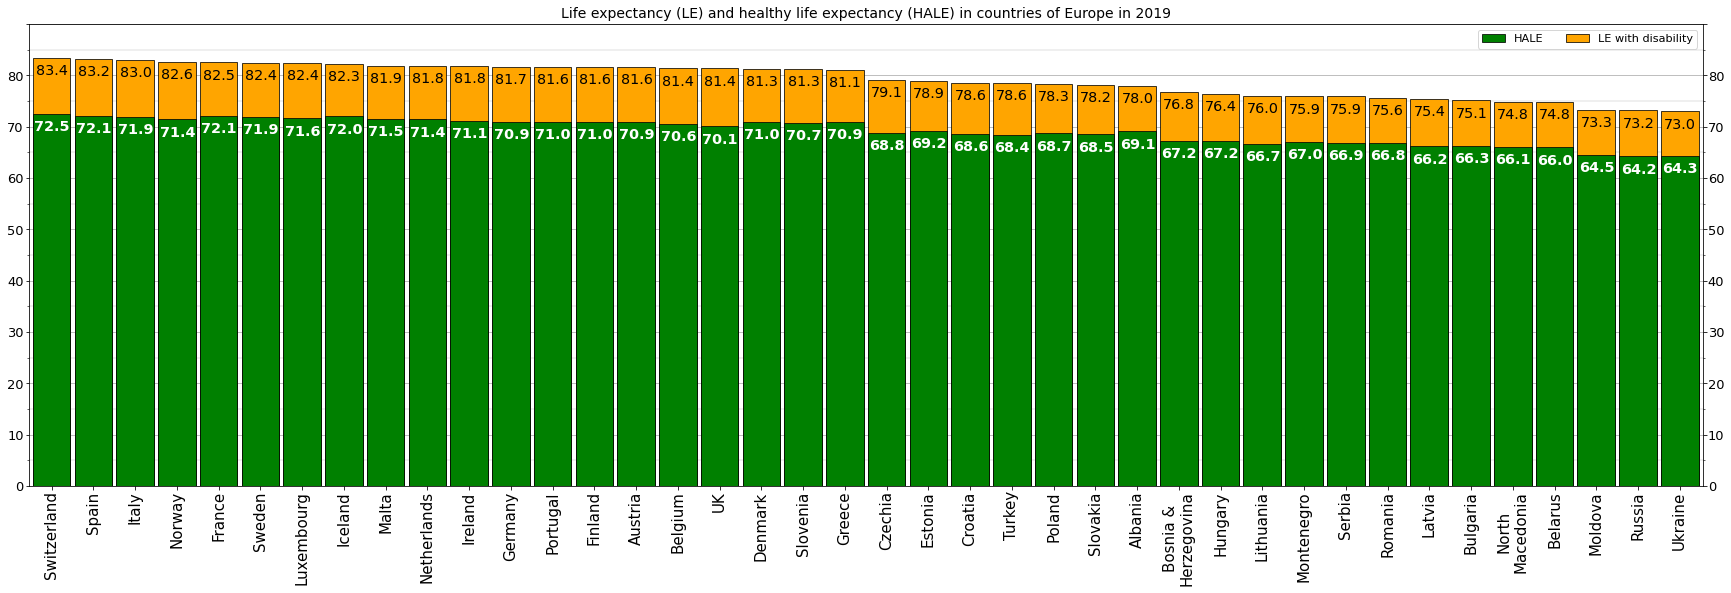

In [16]:
ls_countries = ['Russia', 'Germany', 'UK', 'France', 'Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 'Netherlands', 'Belgium', 'Czechia', 'Sweden'] +\
               ['Greece', 'Portugal', 'Hungary', 'Belarus', 'Austria', 'Switzerland', 'Serbia', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway'] +\
               ['Ireland', 'Croatia', 'Bosnia &\nHerzegovina', 'Moldova', 'Albania', 'Lithuania', 'Slovenia', 'North\nMacedonia', 'Latvia', 'Estonia'] +\
               ['Luxembourg', 'Montenegro', 'Malta', 'Iceland'] +\
               ['Turkey']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
figure_size=(30, 8.5)
title_en = 'Life expectancy (LE) and healthy life expectancy (HALE) in countries of Europe in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ) в странах Европы в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -Europe')

Data has written to file


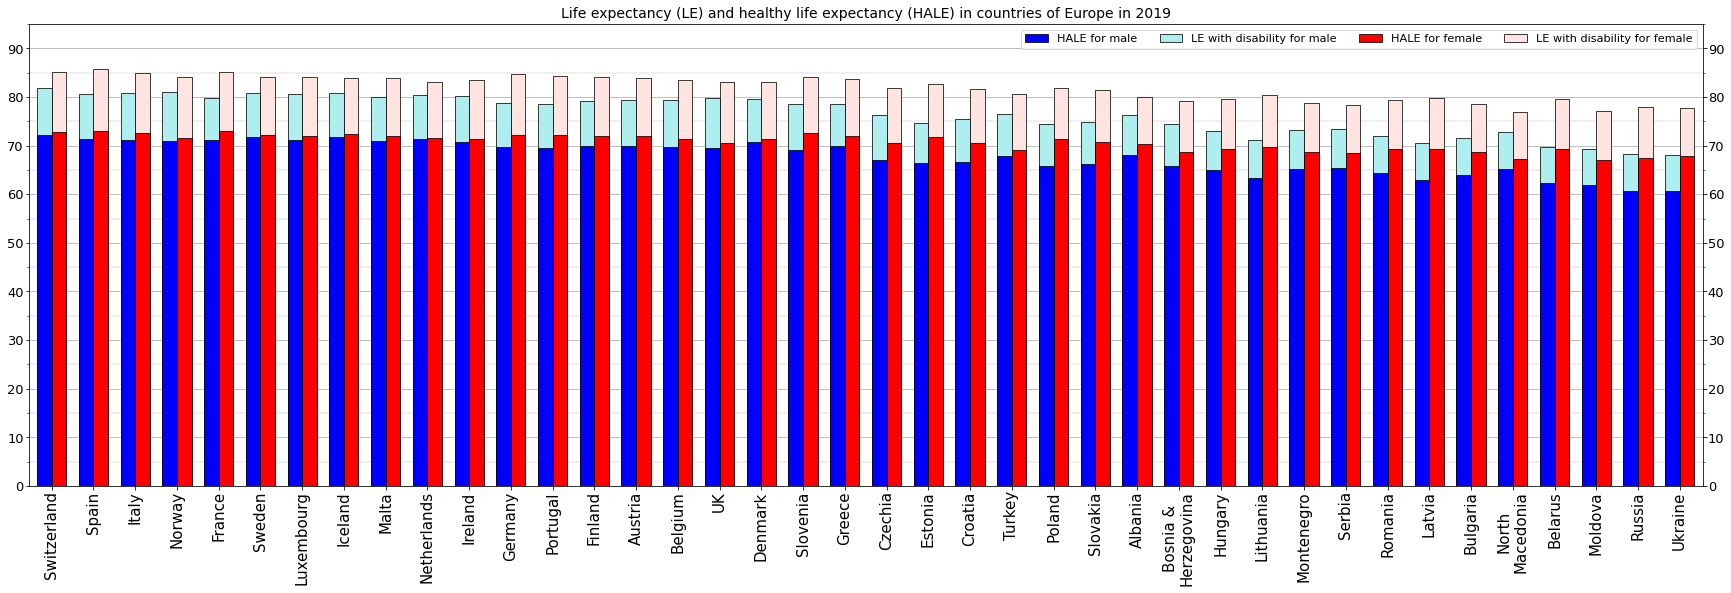

In [17]:
compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -Europe -gender')

<br />
<br />

**[European Union](https://en.wikipedia.org/wiki/European_Union#Member_states)**

Number of items: 28
Data has written to file


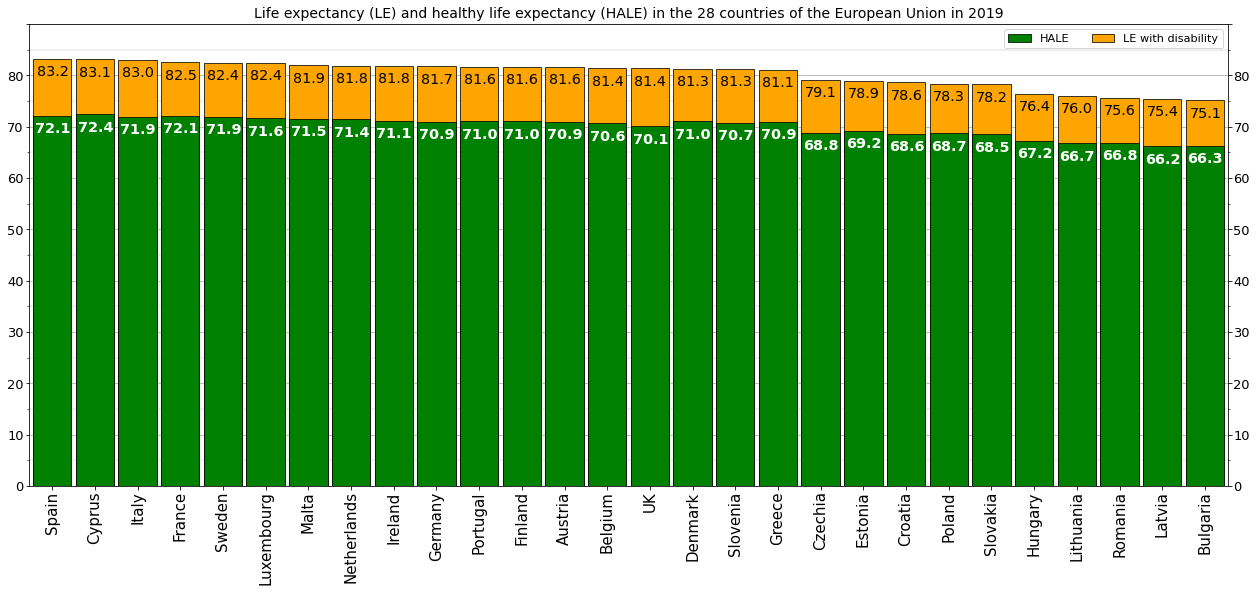

In [18]:
ls_countries = ['Germany', 'UK', 'France', 'Italy', 'Spain', 'Poland', 'Romania', 'Netherlands', 'Belgium', 'Czechia', 'Sweden'] +\
               ['Greece', 'Portugal', 'Hungary', 'Austria', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia'] +\
               ['Ireland', 'Croatia', 'Lithuania', 'Slovenia', 'Latvia', 'Estonia'] +\
               ['Luxembourg', 'Malta', ] + ['Cyprus']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
figure_size=(21.5, 8.5)
title_en = 'Life expectancy (LE) and healthy life expectancy (HALE) in the 28 countries of the European Union in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ) в 28 странах Еврейского Союза в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -European Union')

Data has written to file


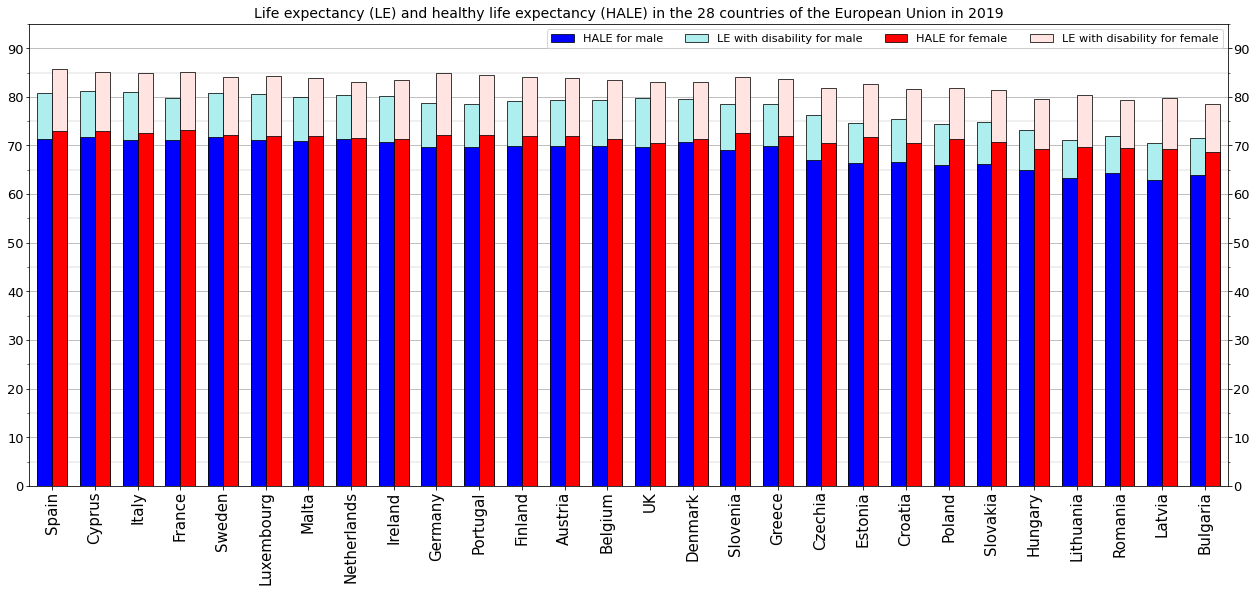

In [19]:
compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -European Union -gender')

<br />
<br />

**Asia**:
[list by life expectancy](https://en.wikipedia.org/wiki/List_of_Asian_countries_by_life_expectancy),
[list by population](https://en.wikipedia.org/wiki/List_of_Asian_countries_by_population#Table),
[list of states](https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_Asia#Sovereign_states)

Number of items: 40
Data has written to file


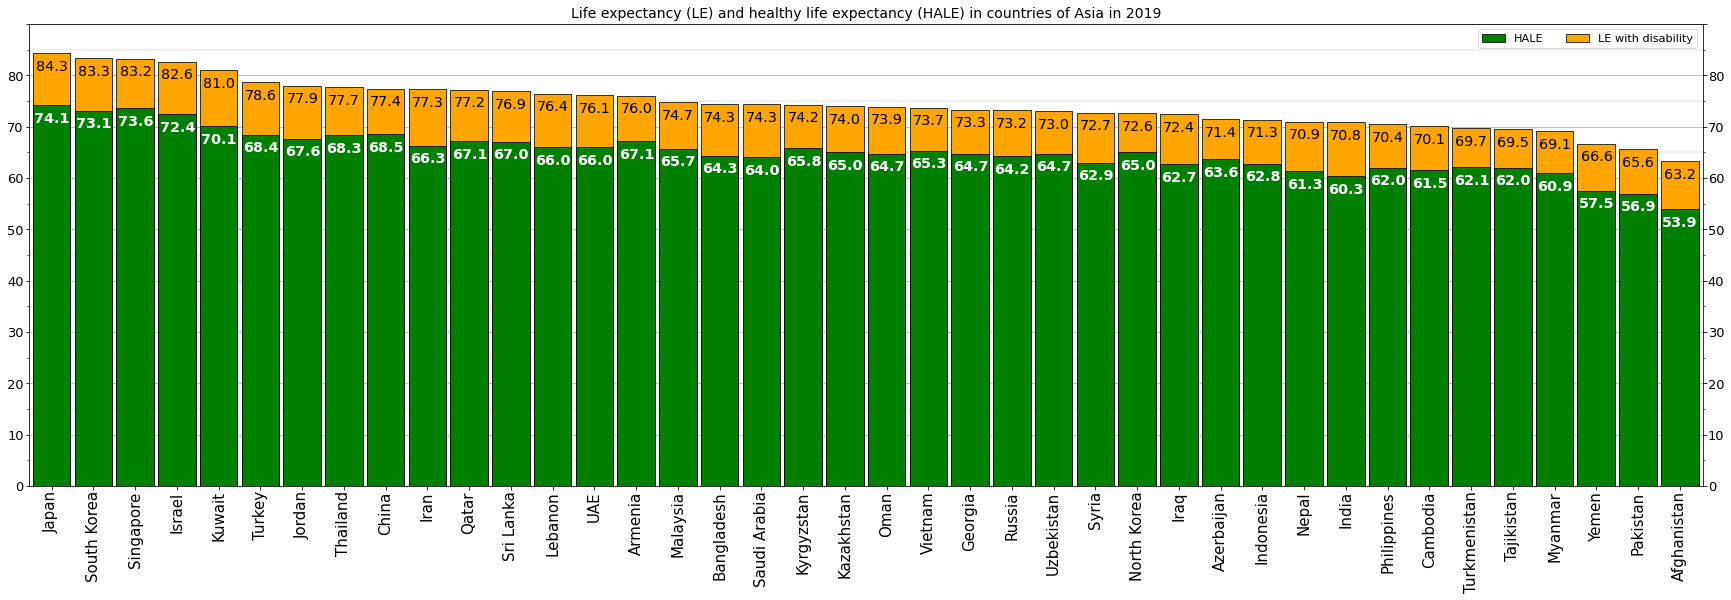

In [20]:
ls_countries = ['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Russia', 'Japan', 'Philippines', 'Vietnam', 'Iran', 'Turkey', 'Thailand'] +\
               ['Myanmar', 'South Korea', 'Iraq', 'Afghanistan', 'Uzbekistan', 'Saudi Arabia', 'Malaysia', 'Yemen', 'Nepal', 'North Korea'] +\
               ['Sri Lanka', 'Syria', 'Kazakhstan', 'Cambodia', 'Jordan', 'UAE', 'Tajikistan', 'Azerbaijan', 'Israel'] +\
               ['Kyrgyzstan', 'Singapore', 'Turkmenistan'] +\
               ['Georgia', 'Armenia'] +\
               ['Lebanon', 'Oman', 'Kuwait', 'Qatar']
               # ['Mongolia', 'Bahrain', 'Timor-Leste', 'Cyprus']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
figure_size=(30, 8.5)
title_en = 'Life expectancy (LE) and healthy life expectancy (HALE) in countries of Asia in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ) в странах Азии в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -Asia')

Data has written to file


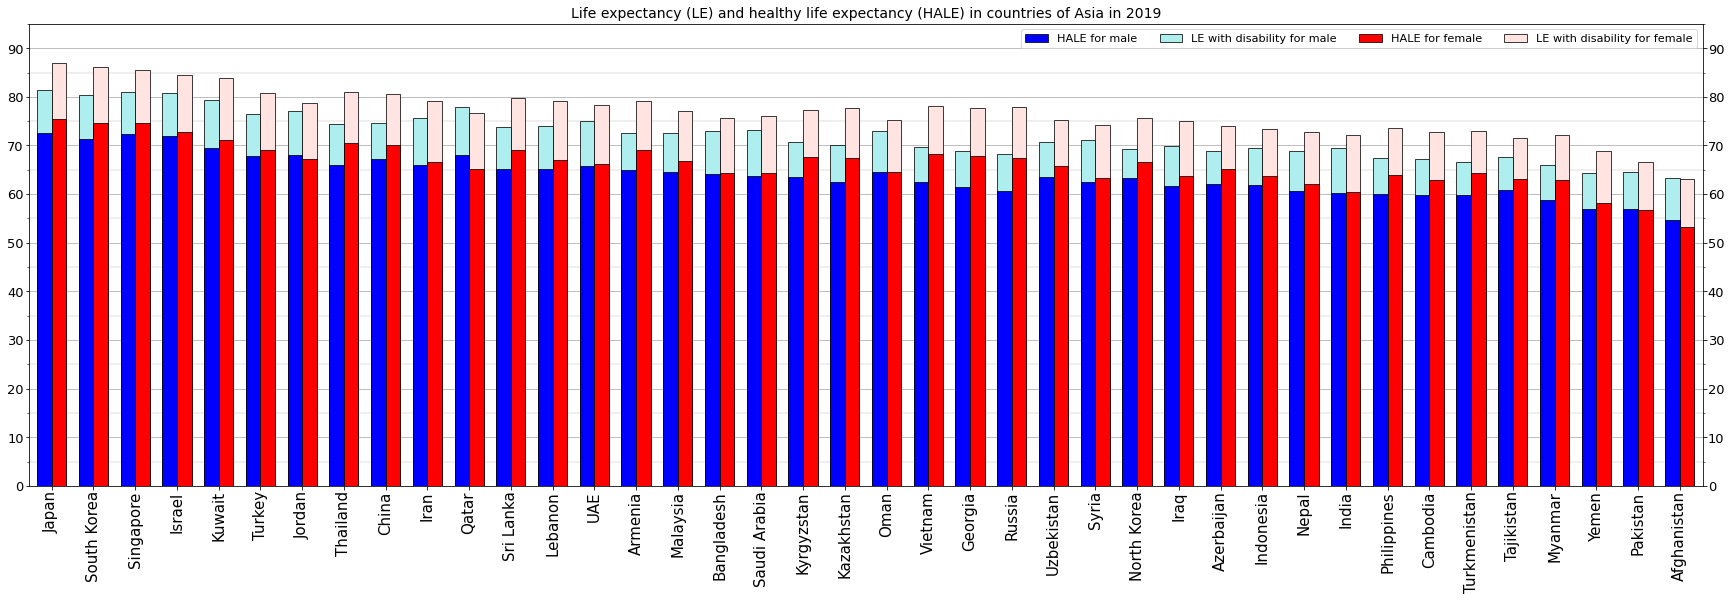

In [21]:
compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -Asia -gender')

<br />
<br />

**Asia**:
[list by life expectancy](https://en.wikipedia.org/wiki/List_of_Asian_countries_by_life_expectancy),
[list by population](https://en.wikipedia.org/wiki/List_of_Asian_countries_by_population#Table),
[list of states](https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_Asia#Sovereign_states)<br />
**Oceania**:
[list by population](https://en.wikipedia.org/wiki/List_of_Oceanian_countries_by_population#Table),
[list of states](https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_Oceania#Sovereign_states)

Number of items: 40
Data has written to file


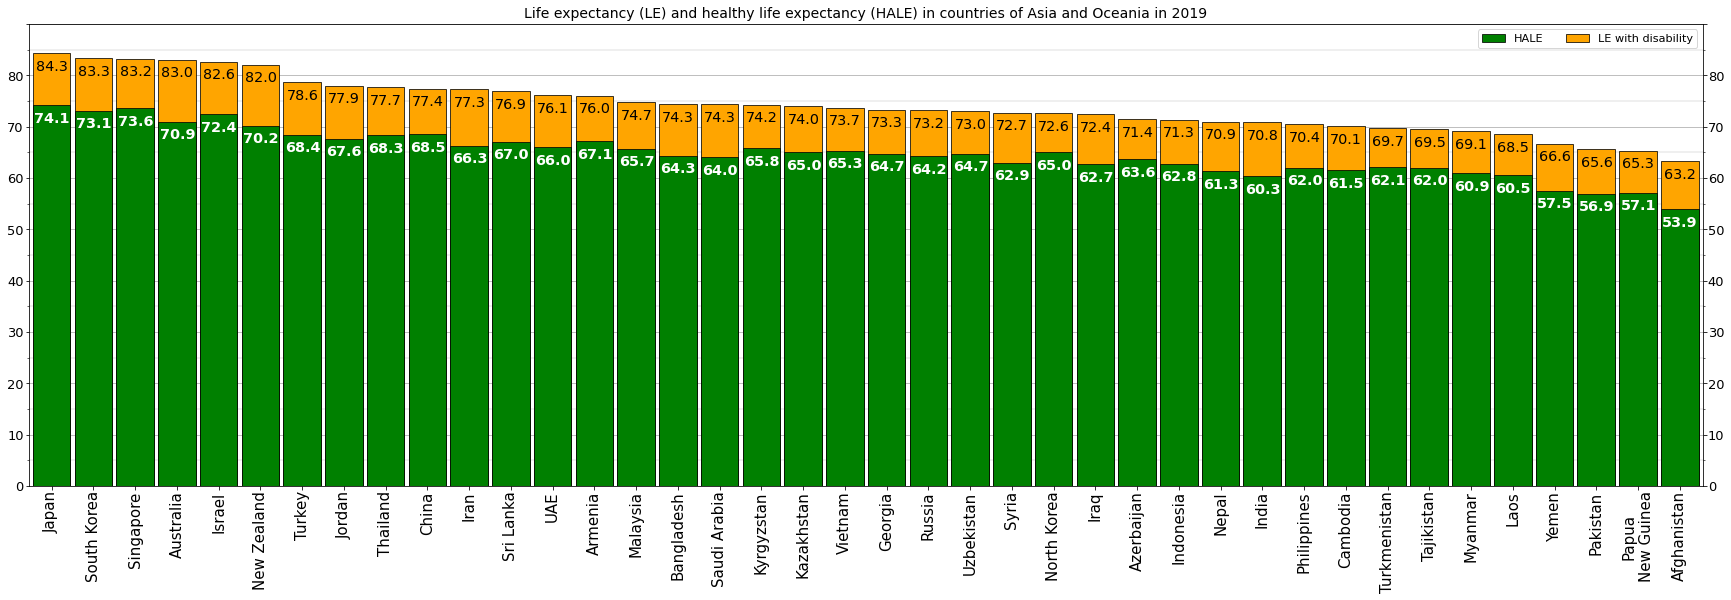

In [22]:
ls_countries = ['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Russia', 'Japan', 'Philippines', 'Vietnam', 'Iran', 'Turkey', 'Thailand'] +\
               ['Myanmar', 'South Korea', 'Iraq', 'Afghanistan', 'Uzbekistan', 'Saudi Arabia', 'Malaysia', 'Yemen', 'Nepal', 'North Korea'] +\
               ['Sri Lanka', 'Syria', 'Kazakhstan', 'Cambodia', 'Jordan', 'UAE', 'Tajikistan', 'Azerbaijan', 'Israel'] +\
               ['Kyrgyzstan', 'Singapore', 'Turkmenistan'] +\
               ['Laos', 'Georgia', 'Armenia'] +\
               ['Australia', 'Papua\nNew Guinea', 'New Zealand']
               # ['Lebanon', 'Oman', 'Kuwait', 'Mongolia', 'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
figure_size=(30, 8.5)
title_en = 'Life expectancy (LE) and healthy life expectancy (HALE) in countries of Asia and Oceania in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ) в странах Азии и Океании в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -Asia and Oceania')

Data has written to file


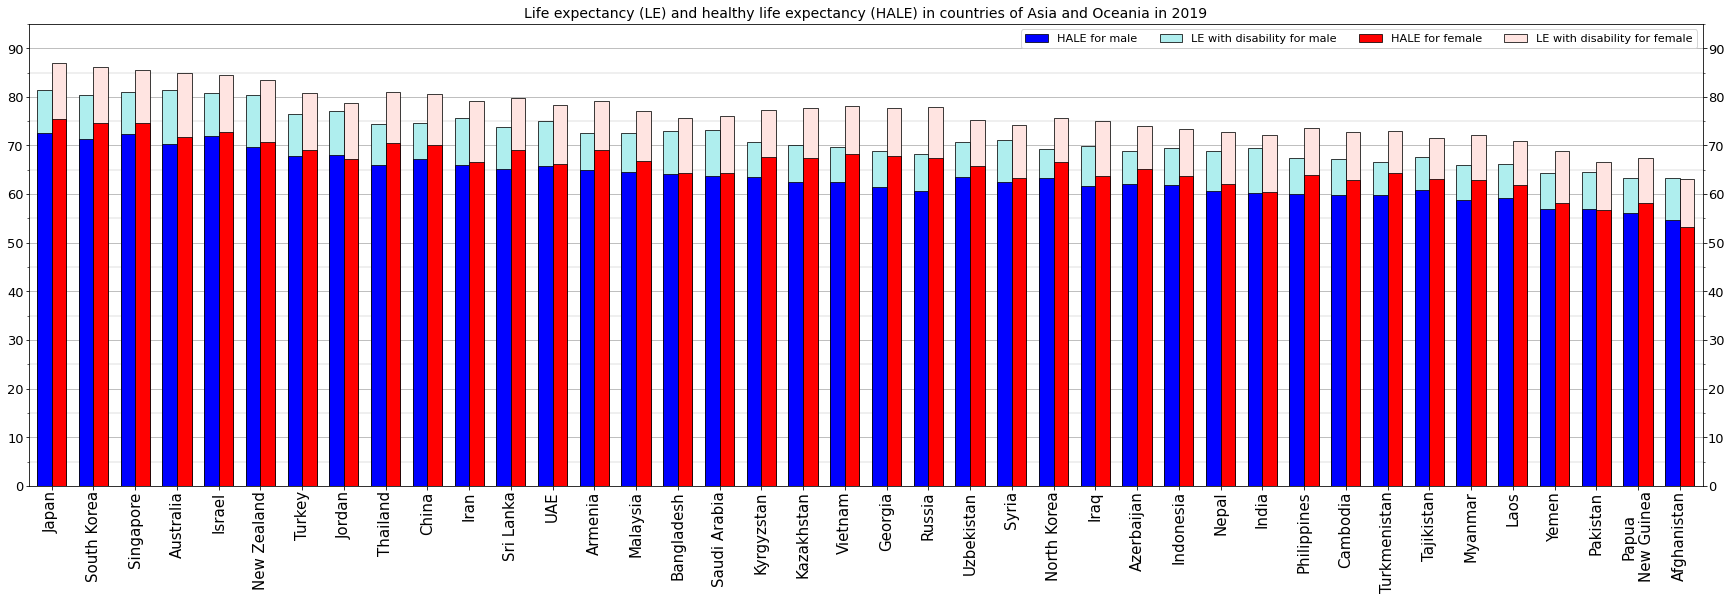

In [23]:
compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -Asia and Oceania -gender')

<br />
<br />

**South America**:
[list by life expectancy](https://en.wikipedia.org/wiki/List_of_South_American_countries_by_life_expectancy),
[list by population](https://en.wikipedia.org/wiki/List_of_South_American_countries_by_population),
[list of states](https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_South_America#Sovereign_states)<br />
**North America**:
[list by life expectancy](https://en.wikipedia.org/wiki/List_of_North_American_countries_by_life_expectancy),
[list by population](https://en.wikipedia.org/wiki/List_of_North_American_countries_by_population),
[list of states](https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_North_America#Sovereign_states)

Number of items: 30
Data has written to file


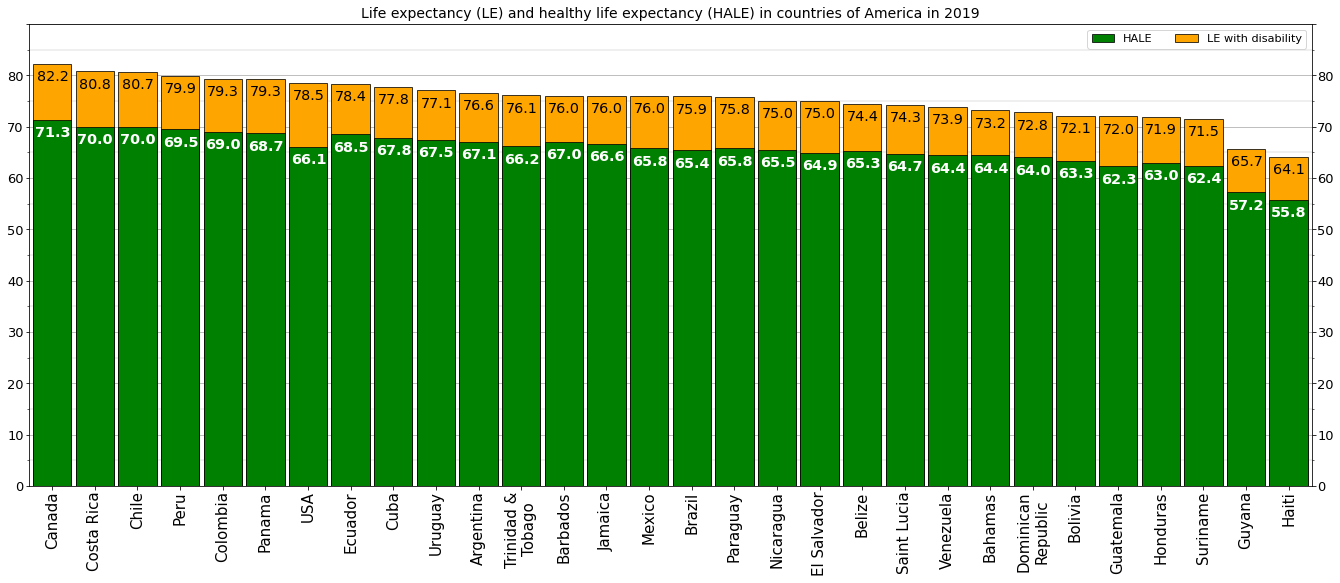

In [24]:
ls_countries = ['USA', 'Mexico', 'Canada', 'Guatemala', 'Haiti', 'Dominican\nRepublic', 'Cuba', 'Honduras', 'Nicaragua', 'El Salvador'] +\
               ['Costa Rica', 'Panama', 'Jamaica', 'Trinidad &\nTobago', 'Bahamas', 'Belize', 'Barbados', 'Saint Lucia'] +\
               ['Brazil', 'Colombia', 'Argentina', 'Peru', 'Venezuela', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay'] +\
               ['Guyana', 'Suriname']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
figure_size=(23, 8.5)
title_en = 'Life expectancy (LE) and healthy life expectancy (HALE) in countries of America in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ) в странах Америки в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -America')

Data has written to file


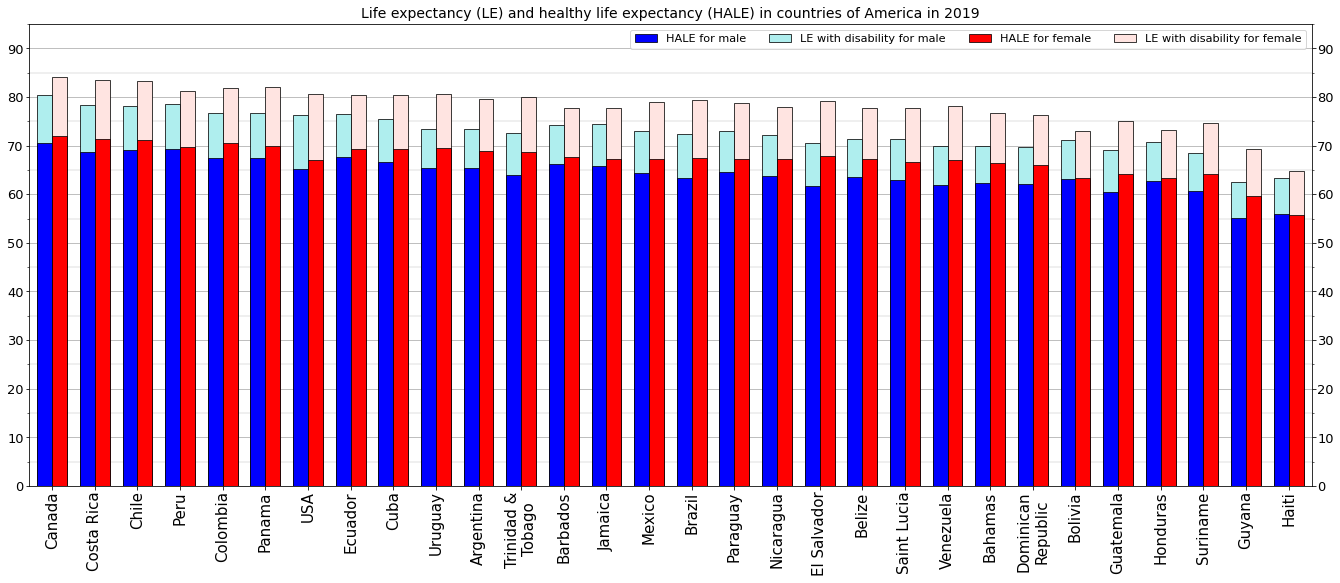

In [25]:
compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -America -gender')

<br />
<br />

**Africa**:
[list by life expectancy](https://en.wikipedia.org/wiki/List_of_African_countries_by_life_expectancy),
[list by population](https://en.wikipedia.org/wiki/List_of_African_countries_by_population#Table),
[list of states](https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_Africa#Sovereign_states)

Number of items: 40
Data has written to file


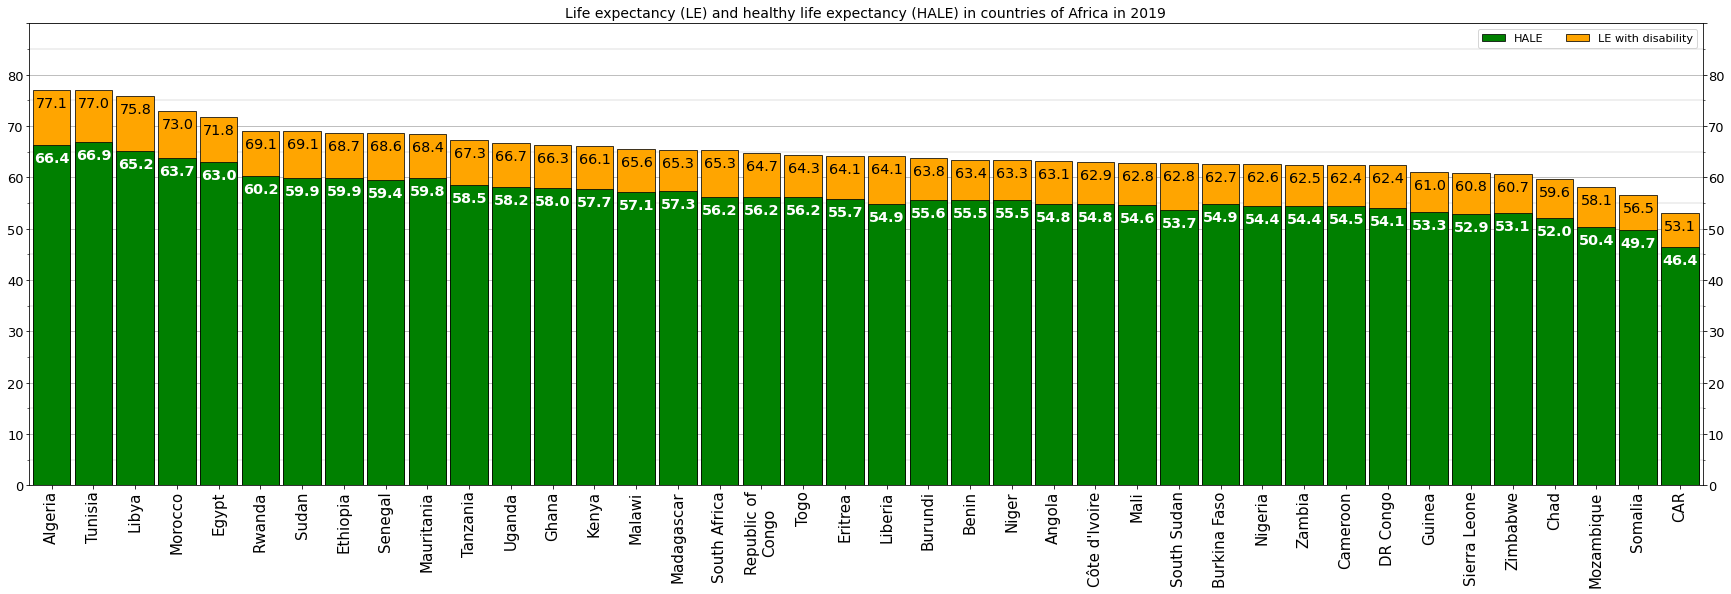

In [26]:
ls_countries = ['Nigeria', 'Ethiopia', 'Egypt', 'DR Congo', 'Tanzania', 'South Africa', 'Kenya', 'Uganda', 'Sudan'] +\
               ['Algeria', 'Morocco', 'Angola', 'Mozambique', 'Ghana', 'Madagascar', 'Cameroon', 'Côte d\'Ivoire'] +\
               ['Niger', 'Burkina Faso', 'Mali', 'Malawi', 'Zambia', 'Senegal', 'Chad', 'Somalia', 'Zimbabwe', 'Guinea'] +\
               ['Rwanda', 'Benin', 'Burundi', 'Tunisia', 'South Sudan', 'Togo', 'Sierra Leone', 'Libya', 'Republic of\nCongo'] +\
               ['Liberia', 'CAR', 'Mauritania', 'Eritrea']
               # ['Botswana']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
figure_size=(30, 8.5)
title_en = 'Life expectancy (LE) and healthy life expectancy (HALE) in countries of Africa in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ) в странах Африки в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -Africa')

Data has written to file


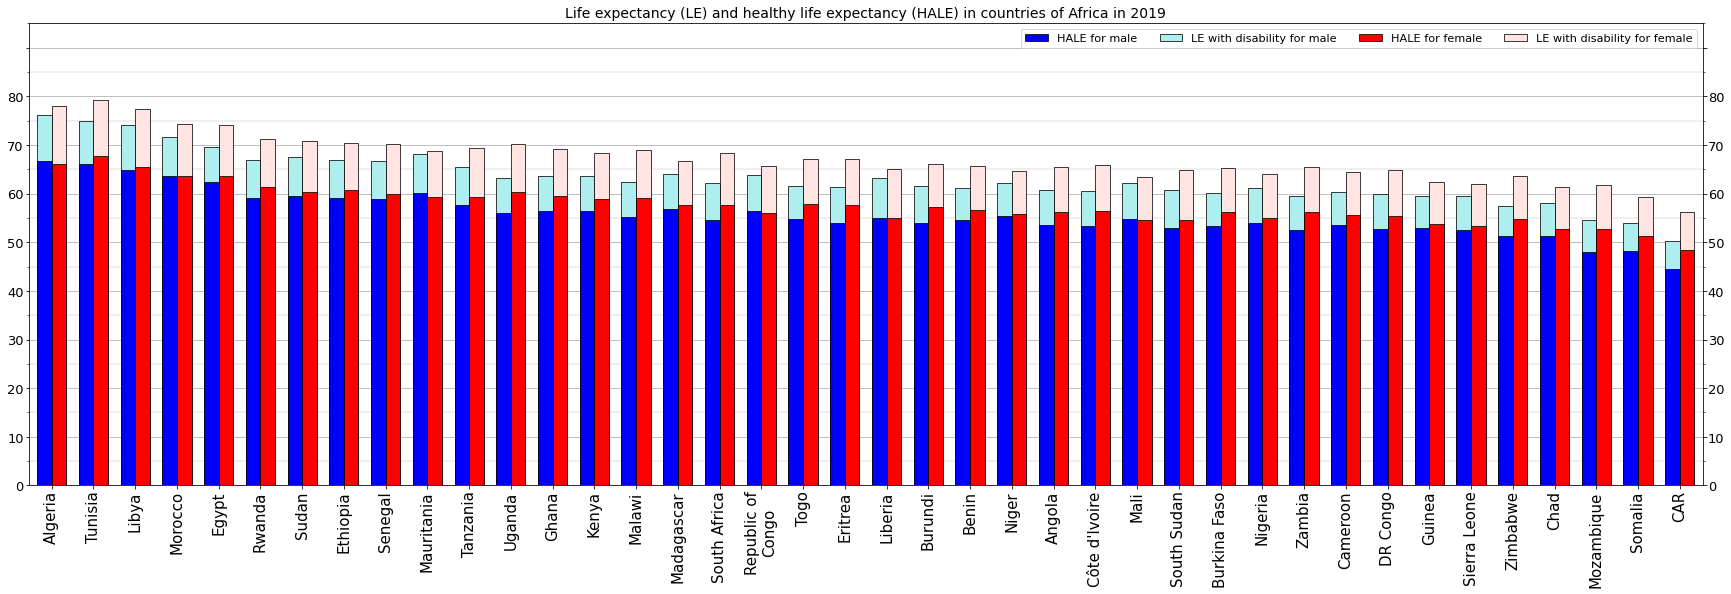

In [27]:
compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, hide_upper_label=True, file_name='Healthy life expectancy bar chart -Africa -gender')

<br />
<br />

[**CIS** (Commonwealth of Independent States)](https://en.wikipedia.org/wiki/Commonwealth_of_Independent_States#Membership)

Number of items: 12
Data has written to file


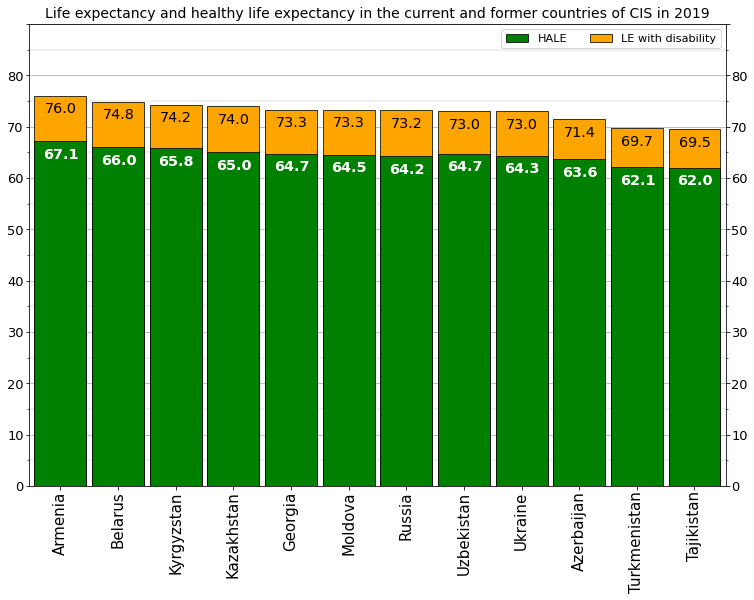

In [28]:
ls_countries = ['Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Russia', 'Tajikistan', 'Uzbekistan'] +\
               ['Turkmenistan', 'Ukraine', 'Georgia']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
if LANG=='ru':
    figure_size=(15, 8.5)   # for English 12.5, for Russian 15
else:
    figure_size=(12.5, 8.5)
title_en = 'Life expectancy and healthy life expectancy in the current and former countries of CIS in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ)\nв нынешних и бывших странах СНГ в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -CIS')

Data has written to file


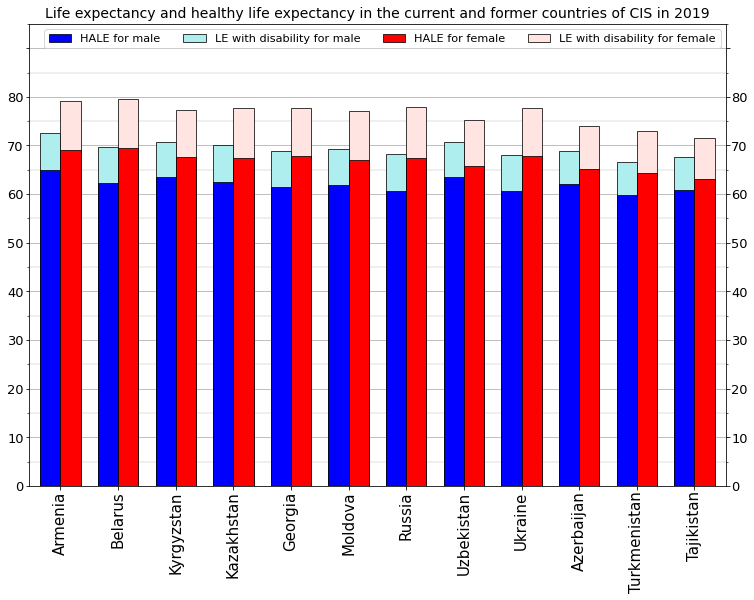

In [29]:
short_legend = (LANG=='ru')

compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, short_legend=short_legend, hide_upper_label=True,
                            destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -CIS -gender')

<br />

Number of items: 7
Data has written to file


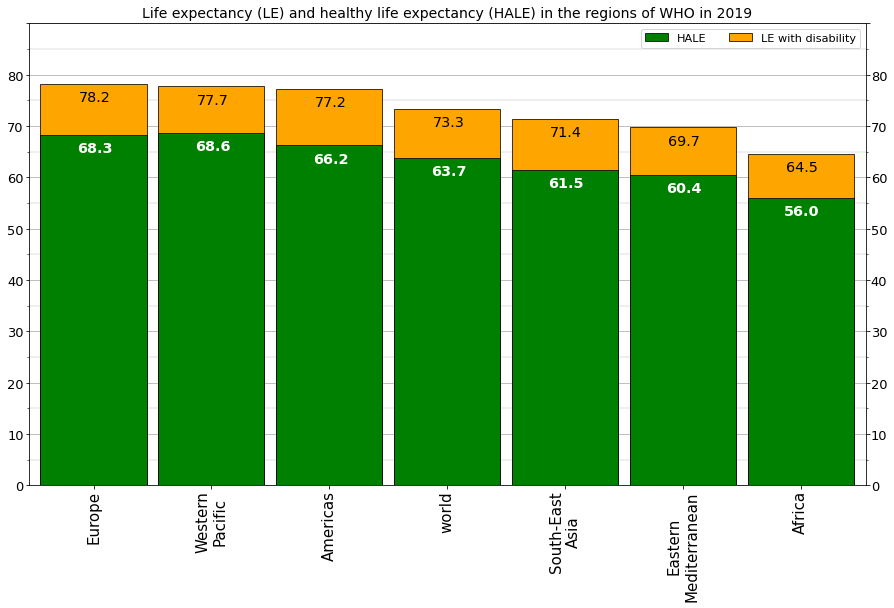

In [30]:
ls_countries = ['world', 'Africa', 'Americas', 'South-East\nAsia', 'Europe', 'Eastern\nMediterranean', 'Western\nPacific']

columns_sorting=['LE_birth_o', 'HALE_birth_o']
figure_size=(15, 8.5)
title_en = 'Life expectancy (LE) and healthy life expectancy (HALE) in the regions of WHO in 2019'
title_ru = 'Ожидаемая продолжительность жизни (ОПЖ) и ожидаемая продолжительность здоровой жизни (ОПЗЖ)\nв регионах ВОЗ в 2019 году'

compare_countries(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                  title_en=title_en, title_ru=title_ru, destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -WHO regions')

Data has written to file


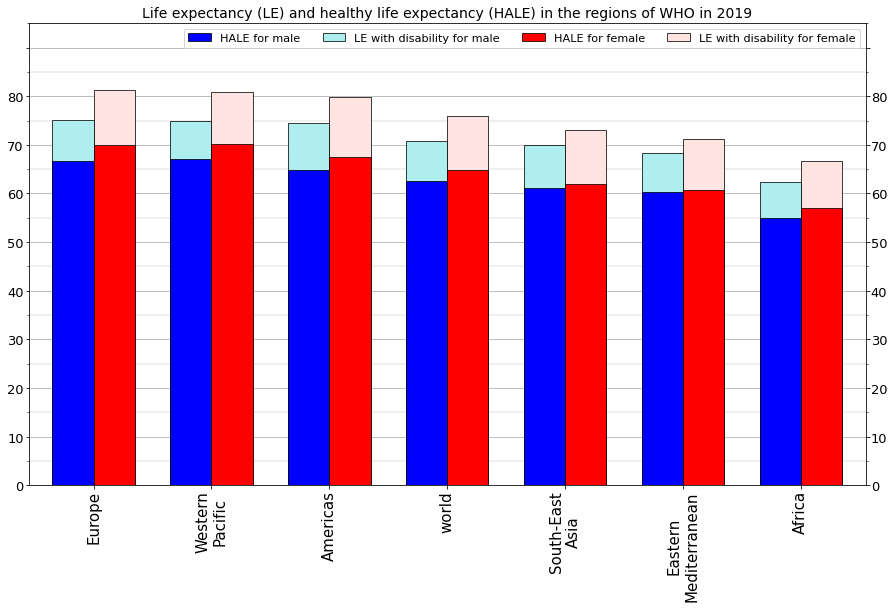

In [31]:
short_legend = (LANG=='ru')

compare_countries_by_gender(df, ls_countries, columns_sorting=columns_sorting, figure_size=figure_size, lang=LANG,
                            title_en=title_en, title_ru=title_ru, short_legend=short_legend, hide_upper_label=True,
                            destination=DESTINATION_OUTPUT, file_name='Healthy life expectancy bar chart -WHO regions -gender')

In [32]:
# play beep to denote completion of the program
import IPython.display as ipd
import numpy as np

# manually generated sound
t = 1  # time is seconds
beep = np.sin(2*np.pi*400*np.arange(10000*t)/10000)
ipd.Audio(beep, rate=10000, autoplay=True)